In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df = pd.read_csv('healthcare-dataset-stroke-data (1).csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df['stroke'].value_counts()
#stroke 1- stroke
# 0 - no stroke

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
#this is encoded data

In [6]:
df.shape


(5110, 12)

In [7]:
#5110 patients ka data, 12 colums, test checkups

## Problem statement
- we want to build the ML moel(Logistic Regression) which will predict whether person will get stroke or not

## Exploratory Data Analysis:


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

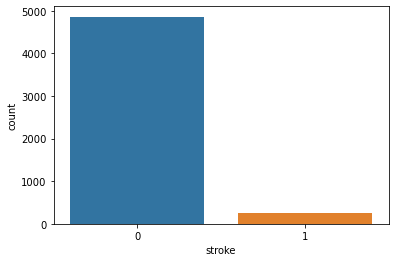

In [8]:
sns.countplot('stroke', data = df)

In [9]:
#Based on the gender we will see the stroke ka countplot


<AxesSubplot:xlabel='stroke', ylabel='count'>

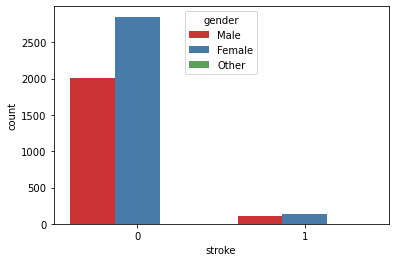

In [10]:
sns.countplot(x= 'stroke', hue = 'gender', data = df, palette = 'Set1')

In [11]:
#Violin plot

<AxesSubplot:xlabel='stroke', ylabel='age'>

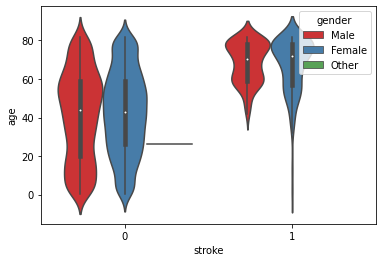

In [12]:
#split by gender and age
sns.violinplot(x = 'stroke', y='age', hue = 'gender', data= df, palette = 'Set1')

https://seaborn.pydata.org/generated/seaborn.violinplot.html

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke'>

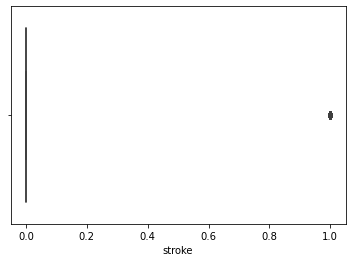

In [13]:
sns.boxplot(df['stroke'])

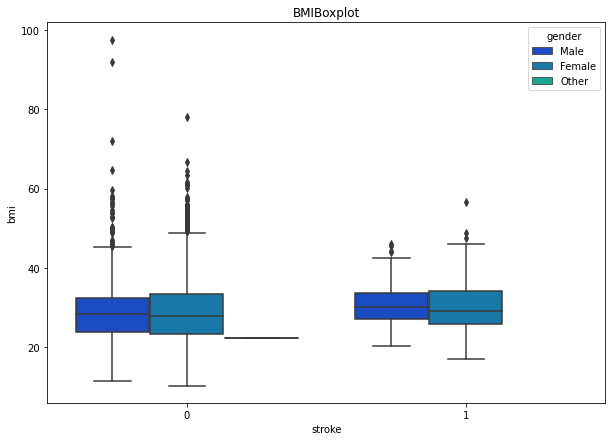

In [14]:
plt.figure(figsize =(10,7))
sns.boxplot(x = 'stroke', y = 'bmi', hue = 'gender', data = df, palette = 'winter')
plt.title('BMIBoxplot')
plt.show()

In [15]:
#Coutplot to check the occurrence of stroke across rural and urban areas

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


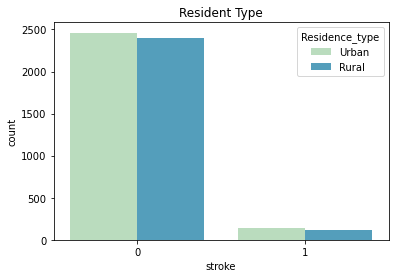

In [17]:
sns.countplot(x = 'stroke', hue = 'Residence_type', data = df, palette = 'GnBu')
plt.title('Resident Type')
plt.show()

In [18]:
#point of analysis
#there is no any difference between residence type, urban, rural

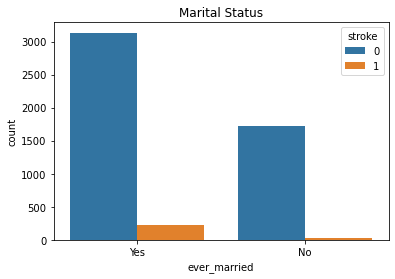

In [19]:
sns.countplot(x = 'ever_married', hue = 'stroke', data = df)
plt.title('Marital Status')
plt.show()

In [20]:
#married- yes- chances high for stroke

In [21]:
#countplot to check patients with/without heart disease and stroke

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


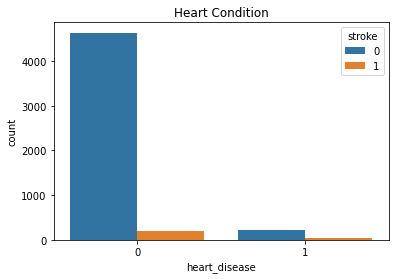

In [23]:
sns.countplot(x = 'heart_disease', hue = 'stroke', data = df)
plt.title('Heart Condition')
plt.show()

In [24]:
#person with no heart disease seems to have chances of stroke

In [25]:
#count plot to check the occurences of stroke by occupation

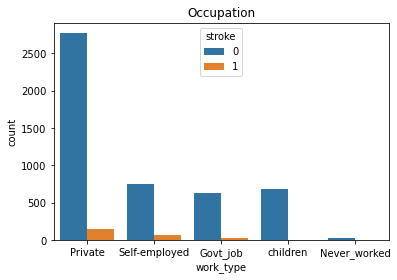

In [26]:
sns.countplot(x = 'work_type', hue = 'stroke', data = df)
plt.title('Occupation')
plt.show()

In [27]:
#private, self-employed, gov_job work employees.
#for stroke

### feature engineering

In [28]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
#encoding on categorical variable

In [30]:
#dummy variable trap- One hot encoding

In [31]:
residence = pd.get_dummies(df['Residence_type'], drop_first = True)

In [32]:
residence

,Urban
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [33]:
df1 = pd.concat([df,residence],axis = 1)

In [34]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [35]:
df1.drop(['Residence_type'], axis = 1, inplace = True)

In [36]:
df1['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [37]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0


In [38]:
sex = pd.get_dummies(df['gender'],drop_first = True)
df2 = pd.concat([df1,sex], axis =1)


In [39]:
sex

,Male,Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5105,0,0
5106,0,0
5107,0,0
5108,1,0


In [40]:
df2.drop(['gender'], axis = 1, inplace = True)

In [41]:
df2.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other
0,9046,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1,1,0
1,51676,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1,0,0,0
2,31112,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0,0,0


In [42]:
marital_status = pd.get_dummies(df['ever_married'])

In [43]:
marital_status

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5105,0,1
5106,0,1
5107,0,1
5108,0,1


In [44]:
df2.drop(['ever_married'], axis =1, inplace = True)

In [45]:
df3 = pd.concat([df2, marital_status], axis = 1)

In [46]:
df3.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban,Male,Other,No,Yes
0,9046,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,0,0,1
1,51676,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,0,0,0,0,1
2,31112,80.0,0,1,Private,105.92,32.5,never smoked,1,0,1,0,0,1
3,60182,49.0,0,0,Private,171.23,34.4,smokes,1,1,0,0,0,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,0,0,0,1


In [47]:
smoking = pd.get_dummies(df2['smoking_status'], drop_first = True)

In [48]:
smoking

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
5105,0,1,0
5106,0,1,0
5107,0,1,0
5108,1,0,0


In [49]:
df3.drop(['smoking_status'], axis = 1, inplace = True)
df4 = pd.concat([df3, smoking], axis = 1)

In [50]:
df4.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Urban,Male,Other,No,Yes,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,Private,228.69,36.6,1,1,1,0,0,1,1,0,0
1,51676,61.0,0,0,Self-employed,202.21,NaN,1,0,0,0,0,1,0,1,0
2,31112,80.0,0,1,Private,105.92,32.5,1,0,1,0,0,1,0,1,0
3,60182,49.0,0,0,Private,171.23,34.4,1,1,0,0,0,1,0,0,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,1,0,0,0,0,1,0,1,0


In [51]:
working = pd.get_dummies(df3['work_type'], drop_first = True)

In [52]:
working

,Never_worked,Private,Self-employed,children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5105,0,1,0,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [53]:
df4.drop(['work_type'], axis =1 , inplace = True)

In [54]:
df5 = pd.concat([df4, working], axis = 1)

In [55]:
df5.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban,Male,Other,No,Yes,formerly smoked,never smoked,smokes,Never_worked,Private,Self-employed,children
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,0,1,1,0,0,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,0,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,1,0,0,1,0,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,1,0,0
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,0,1,0,1,0,0,0,1,0


## Model Building

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
df5.drop(['id'], axis = 1,inplace = True)

In [58]:
df5.dropna(inplace = True)

In [59]:
df5.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Urban                0
Male                 0
Other                0
No                   0
Yes                  0
formerly smoked      0
never smoked         0
smokes               0
Never_worked         0
Private              0
Self-employed        0
children             0
dtype: int64

In [60]:
X = df5.drop('stroke', axis = 1)

In [61]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban,Male,Other,No,Yes,formerly smoked,never smoked,smokes,Never_worked,Private,Self-employed,children
0,67.0,0,1,228.69,36.6,1,1,0,0,1,1,0,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.0,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,0,1,1,0,0,0,1,0,0


In [64]:
y = df5['stroke']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

## Model building
- 1) Object creation
- 2) Model fitting
- 3) Model prediction
- 4) Model evaluation

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
#step 4- model evlaution

In [73]:
from sklearn.metrics import classification_report,accuracy_score

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.00      0.00      0.00        61

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
accuracy_score(y_test, y_pred)

0.9585879158180584

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
print(confusion_matrix(y_test, y_pred))

[[1412    0]
 [  61    0]]


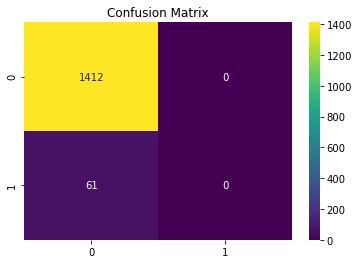

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, cmap = 'viridis', fmt = '2')
plt.title('Confusion Matrix')
plt.show()

## break till - 11.10am

https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/